## Uniform-Cost Search Algorithm

## Libraries and packages used

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import sys
import json

# Functions


In [29]:
max_possible_value = sys.maxsize

def show_weighted_graph(networkx_graph, node_size, font_size, fig_size):
    
    # Allocate the given fig_size in order to have space for each node
    plt.figure(num=None, figsize=fig_size, dpi=80)
    plt.axis('off')

    # Compute the position of each vertex in order to display it nicely
    nodes_position = nx.spring_layout(networkx_graph) 

    # You can change the different layouts depending on your graph
    # Extract the weights corresponding to each edge in the graph
    edges_weights  = nx.get_edge_attributes(networkx_graph,'weight')
    
    # Draw the nodes (you can change the color)
    nx.draw_networkx_nodes(networkx_graph, nodes_position, node_size=node_size,node_color = ["orange"]*networkx_graph.number_of_nodes())
  
    # Draw only the edges
    nx.draw_networkx_edges(networkx_graph, nodes_position,edgelist=list(networkx_graph.edges), width=2)

    # Add the weights
    nx.draw_networkx_edge_labels(networkx_graph, nodes_position,edge_labels = edges_weights)

    # Add the labels of the nodes
    nx.draw_networkx_labels(networkx_graph, nodes_position, font_size=font_size,font_family='sans-serif')
    plt.axis('off')
    plt.show()


In [30]:
def compute_path_cost(graph, path):
    """
    Compute cost of a path
    """
    cost = 0
    for index_city in range(len(path) - 1):
        cost += graph[path[index_city]][path[index_city + 1]]["weight"]
        
    return cost

In [31]:
def pop_frontier(frontier):
    
    if len(frontier) == 0:
        return None
    
    # copied_list = frontier.copy()
    min = max_possible_value
    max_values = []
    for key, path in frontier:
        #print(key,path)
        if key == min:
            max_values.append(path)
        elif key < min:
            min = key
            max_values.clear()
            max_values.append(path)

    max_values = sorted(max_values, key=lambda x: x[-1])
    # max_values.sort()
    desired_value = max_values[0]
    frontier.remove((min, max_values[0]))
    
    return min, desired_value


In [32]:
def get_frontier_params_new(node, frontier):
    
    for i in range(len(frontier)):
        curr_tuple = frontier[i]
#         print('/n------')
#         print('frontier',frontier[i])
        cost, path = curr_tuple
#         print(path,path[-1])
        if path[-1] == node:
            return True, i, cost, path

    return False, None, None, None

In [100]:
def uniform_cost_search(graph, start, goal):   
    
    path = []    
    explored_nodes = list()    
    
    if start == goal:    
        return path, explored_nodes    
    
    path.append(start)    
    path_cost = 0    
    
    frontier = [(path_cost, path)]
    
    
    while len(frontier) > 0:  
        
        path_cost_till_now, path_till_now = pop_frontier(frontier)
        print('path_till_now',path_till_now,'cost',compute_path_cost(nx.Graph(data), path_till_now))
        current_node = path_till_now[-1]
        #print('current_node',current_node)
        explored_nodes.append(current_node)   
        
        print('\nfrontier',frontier)
        #print('\nfrontier',path_till_now,path_cost_till_now)
        print('\nexplored',explored_nodes)
        
    
        if current_node == goal: 
            print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print('\nFinal Path',path_till_now,'with cost',compute_path_cost(nx.Graph(data), path_till_now))
            print('\nAll explored nodes',explored_nodes)
            print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
            
            
            return (path_till_now,compute_path_cost(nx.Graph(data), path_till_now)), explored_nodes  
    
        neighbours = graph[current_node] 
    
        neighbours_list_int = [n for n in neighbours]
        neighbours_list_int.sort(reverse=False)    
        neighbours_list_str = [str(n) for n in neighbours_list_int]
    
        for neighbour in neighbours_list_str:    
            path_to_neighbour = path_till_now.copy() 
 
            path_to_neighbour.append(neighbour)

            extra_cost = compute_path_cost(nx.Graph(data), path_to_neighbour)

        
            neighbour_cost = extra_cost + path_cost_till_now
            
            new_element = (neighbour_cost, path_to_neighbour)    
    
            is_there, indexx, neighbour_old_cost, _ = get_frontier_params_new(neighbour, frontier)
            
            if (neighbour not in explored_nodes) and not is_there:
                frontier.append(new_element)    
            elif is_there:    
                if neighbour_old_cost > neighbour_cost:    
                    frontier.pop(indexx)    
                    frontier.append(new_element)    
 
    
    return None, None  

## Main

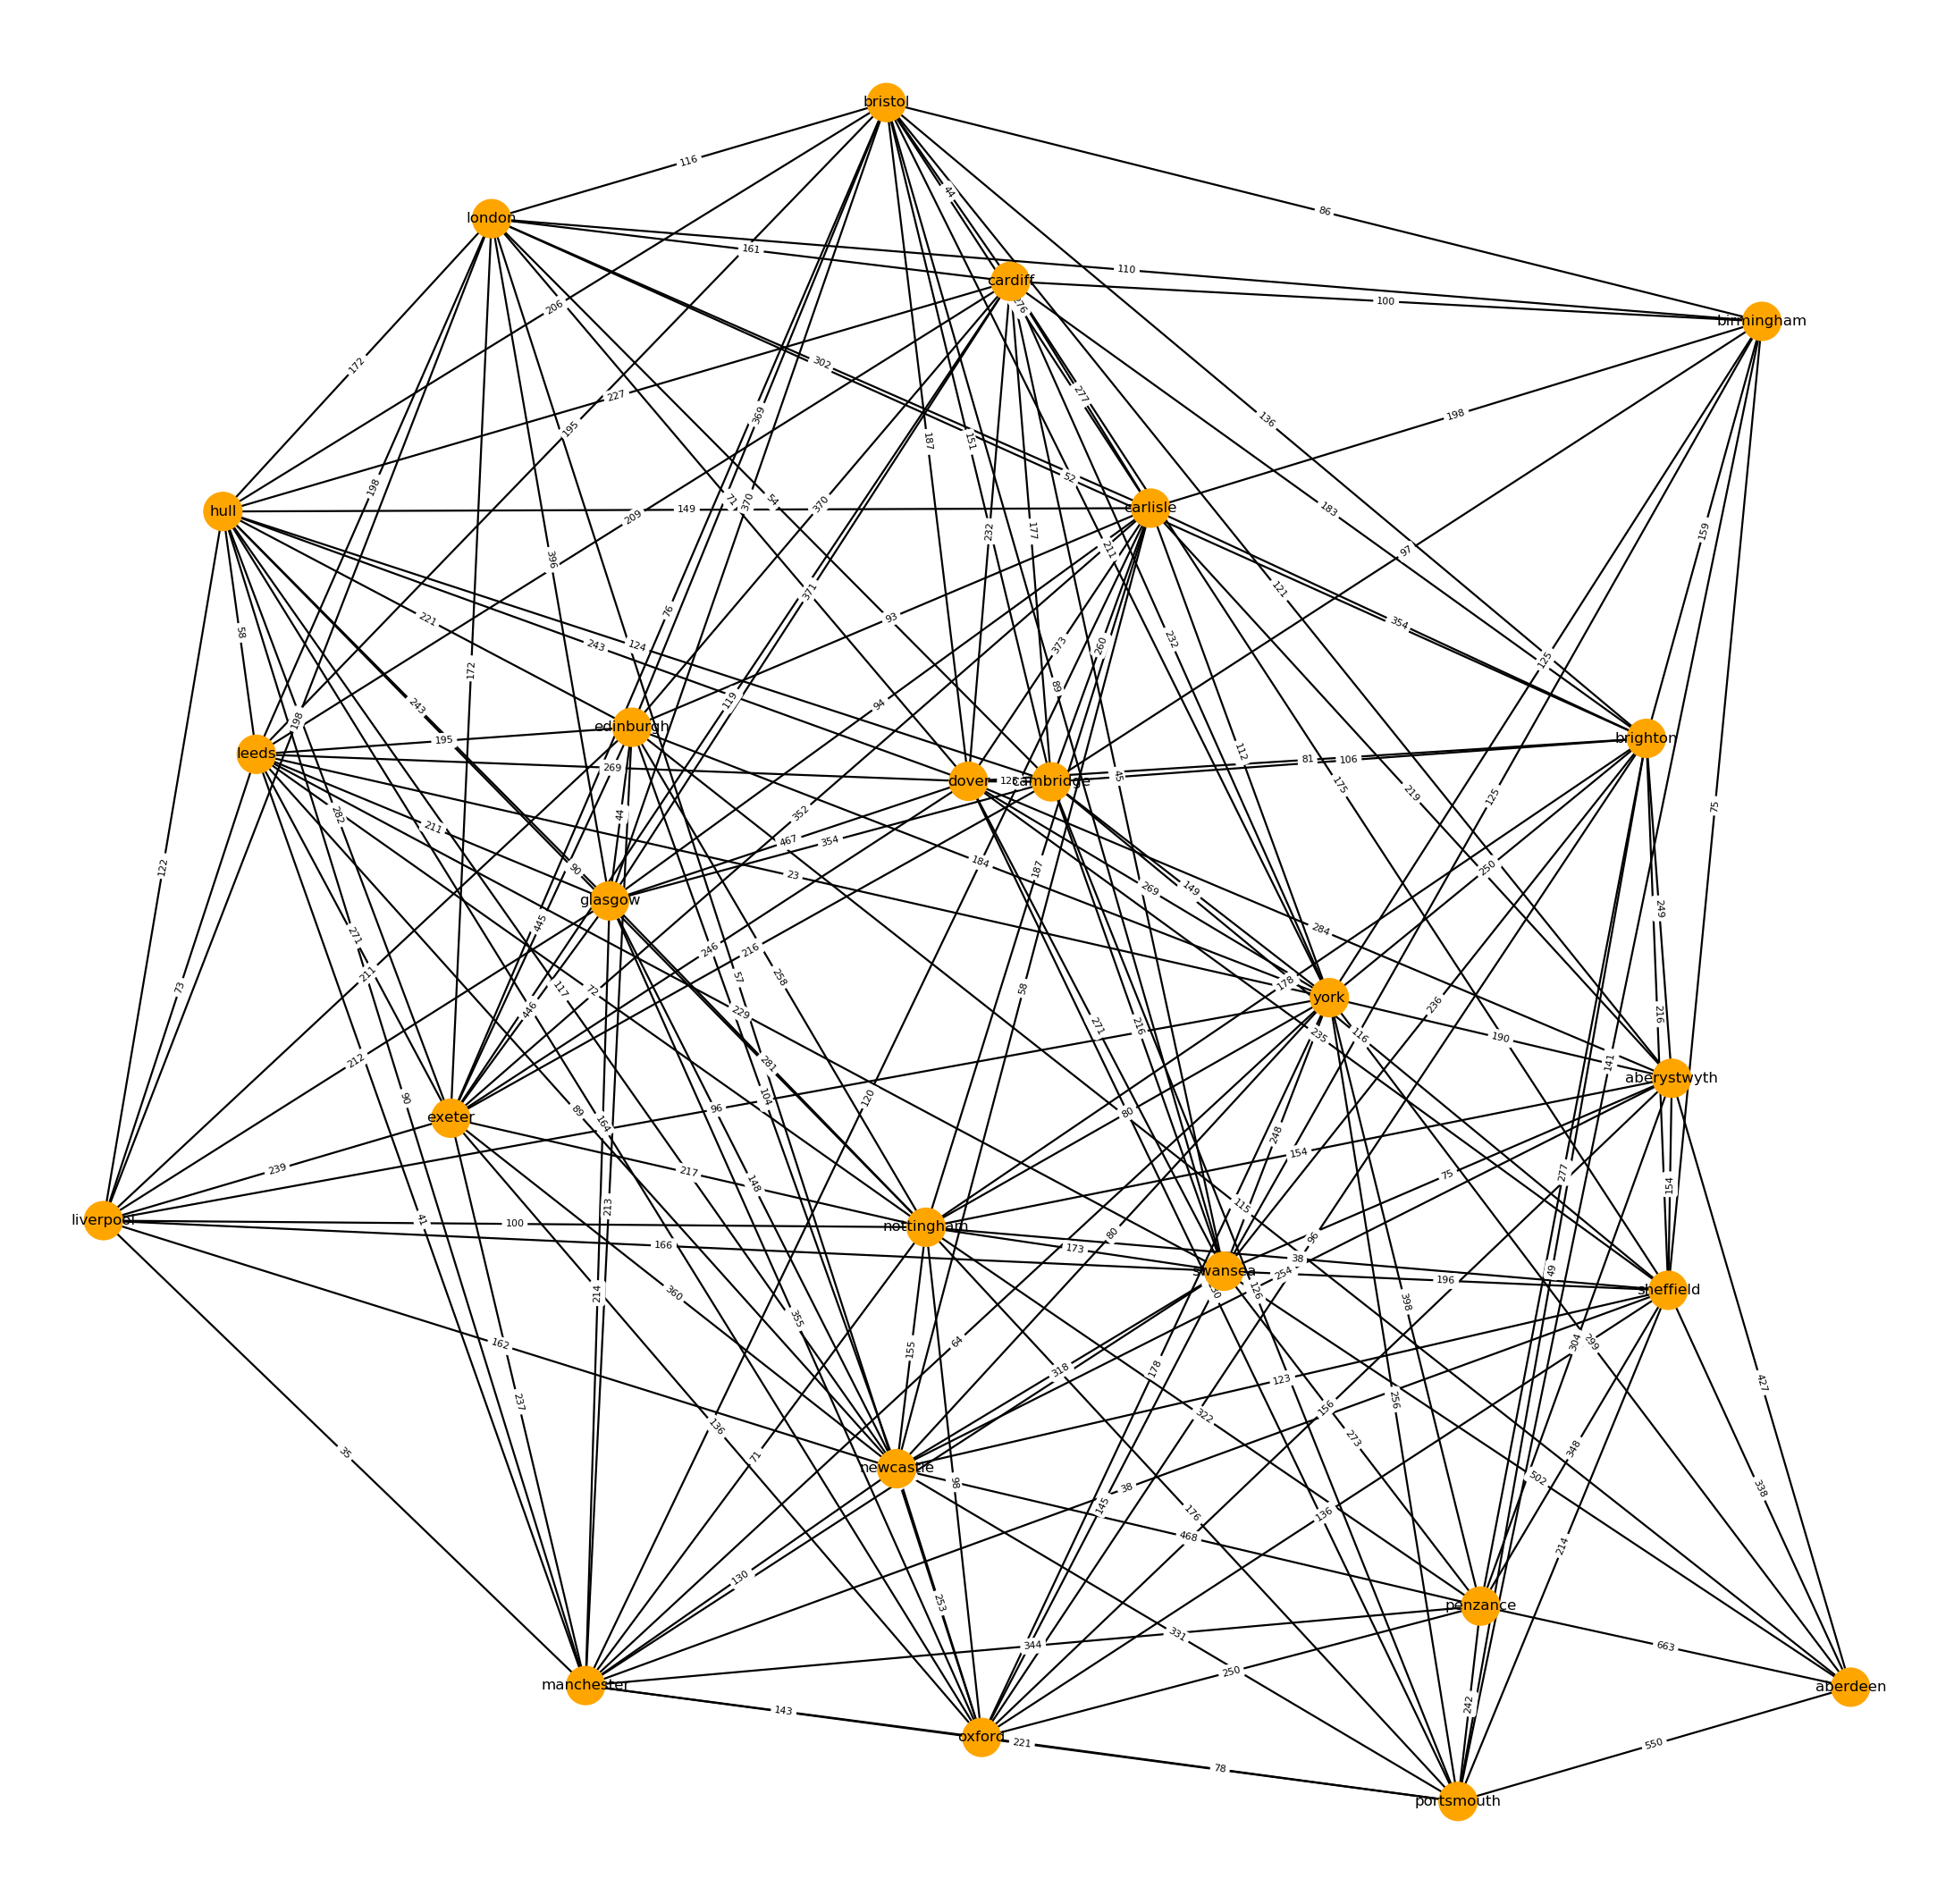

In [57]:
#Load data
with open(r'C:\Users\spyro\Documents\AI\cw1\UK_cities.json') as json_file:
    data = json.load(json_file)
    
    #print(data)
show_weighted_graph(nx.Graph(data), 1500, 15, (35,35))

In [101]:
solution=uniform_cost_search(nx.Graph(data), start='london', goal='aberdeen')

path_till_now ['london'] cost 0

frontier []

explored ['london']
path_till_now ['london', 'brighton'] cost 52

frontier [(110, ['london', 'birmingham']), (116, ['london', 'bristol']), (54, ['london', 'cambridge']), (161, ['london', 'cardiff']), (302, ['london', 'carlisle']), (71, ['london', 'dover']), (172, ['london', 'exeter']), (396, ['london', 'glasgow']), (172, ['london', 'hull']), (198, ['london', 'leeds']), (198, ['london', 'liverpool']), (57, ['london', 'oxford'])]

explored ['london', 'brighton']
path_till_now ['london', 'cambridge'] cost 54

frontier [(110, ['london', 'birmingham']), (116, ['london', 'bristol']), (161, ['london', 'cardiff']), (302, ['london', 'carlisle']), (71, ['london', 'dover']), (172, ['london', 'exeter']), (396, ['london', 'glasgow']), (172, ['london', 'hull']), (198, ['london', 'leeds']), (198, ['london', 'liverpool']), (57, ['london', 'oxford']), (353, ['london', 'brighton', 'aberystwyth']), (282, ['london', 'brighton', 'nottingham']), (381, ['london',

path_till_now ['london', 'glasgow'] cost 396

frontier [(565, ['london', 'hull', 'edinburgh']), (732, ['london', 'cambridge', 'sheffield', 'aberdeen'])]

explored ['london', 'brighton', 'cambridge', 'oxford', 'dover', 'birmingham', 'bristol', 'portsmouth', 'cardiff', 'exeter', 'hull', 'leeds', 'liverpool', 'nottingham', 'sheffield', 'manchester', 'york', 'swansea', 'aberystwyth', 'carlisle', 'penzance', 'newcastle', 'glasgow']
path_till_now ['london', 'hull', 'edinburgh'] cost 393

frontier [(732, ['london', 'cambridge', 'sheffield', 'aberdeen'])]

explored ['london', 'brighton', 'cambridge', 'oxford', 'dover', 'birmingham', 'bristol', 'portsmouth', 'cardiff', 'exeter', 'hull', 'leeds', 'liverpool', 'nottingham', 'sheffield', 'manchester', 'york', 'swansea', 'aberystwyth', 'carlisle', 'penzance', 'newcastle', 'glasgow', 'edinburgh']
path_till_now ['london', 'cambridge', 'sheffield', 'aberdeen'] cost 508

frontier []

explored ['london', 'brighton', 'cambridge', 'oxford', 'dover', 'birm

In [102]:
solution

((['london', 'cambridge', 'sheffield', 'aberdeen'], 508),
 ['london',
  'brighton',
  'cambridge',
  'oxford',
  'dover',
  'birmingham',
  'bristol',
  'portsmouth',
  'cardiff',
  'exeter',
  'hull',
  'leeds',
  'liverpool',
  'nottingham',
  'sheffield',
  'manchester',
  'york',
  'swansea',
  'aberystwyth',
  'carlisle',
  'penzance',
  'newcastle',
  'glasgow',
  'edinburgh',
  'aberdeen'])